# AC2 - Análise de Dados (Best Buy)

Bibliotecas

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados da Tabela

In [24]:
df = pd.read_csv("best_buy_laptops_2024.csv", encoding="utf-8")

Mostrar informações basicas da tabela

In [25]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        489 non-null    object 
 1   model                        488 non-null    object 
 2   aggregateRating/ratingValue  357 non-null    float64
 3   aggregateRating/reviewCount  357 non-null    float64
 4   offers/price                 262 non-null    float64
 5   offers/priceCurrency         489 non-null    object 
 6   depth                        431 non-null    float64
 7   width                        431 non-null    float64
 8   features/0/description       486 non-null    object 
 9   features/1/description       483 non-null    object 
dtypes: float64(5), object(5)
memory usage: 38.3+ KB


None

,aggregateRating/ratingValue,aggregateRating/reviewCount,offers/price,depth,width
count,357.000000,357.000000,262.000000,431.000000,431.000000
mean,4.413445,254.708683,1159.040687,9.678770,11.927030
std,0.641880,607.260976,782.605079,2.911987,3.333199
min,1.000000,1.000000,143.990000,0.490000,0.580000
25%,4.200000,3.000000,639.990000,8.655000,11.300000
50%,4.600000,18.000000,959.990000,9.220000,12.510000
75%,4.800000,208.000000,1494.990000,10.400000,14.050000
max,5.000000,4231.000000,4489.990000,20.250000,18.100000


Manipulação da Tabela (Verificar valores ausentes)

In [26]:
def missing_values_analysis(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print("Valores ausentes por coluna:")
    print(missing_values)

missing_values_analysis(df)

Valores ausentes por coluna:
model                            1
aggregateRating/ratingValue    132
aggregateRating/reviewCount    132
offers/price                   227
depth                           58
width                           58
features/0/description           3
features/1/description           6
dtype: int64


Função para preencher valores ausentes com estratégias adequadas.

In [27]:
def fill_missing_values(df):
    df['offers/price'] = df.groupby('brand')['offers/price'].transform(lambda x: x.fillna(x.mean()))
    
    num_cols = df.select_dtypes(include=['number']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna('Desconhecido')
    
    print("Valores ausentes preenchidos com sucesso!")
    return df

In [28]:
# Verificar valores ausentes
missing_values_analysis(df)

# Preencher valores ausentes
df = fill_missing_values(df)

Valores ausentes por coluna:
model                            1
aggregateRating/ratingValue    132
aggregateRating/reviewCount    132
offers/price                   227
depth                           58
width                           58
features/0/description           3
features/1/description           6
dtype: int64
Valores ausentes preenchidos com sucesso!


Distribuição das avaliações dos laptops

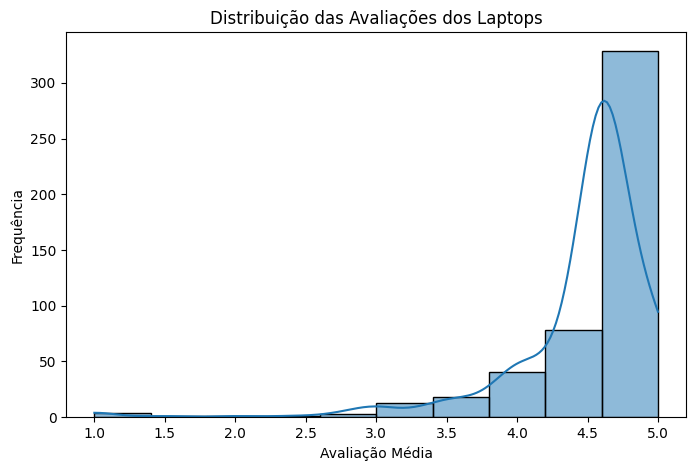

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['aggregateRating/ratingValue'], bins=10, kde=True)
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')
plt.title('Distribuição das Avaliações dos Laptops')
plt.show()

Comparação de preços por marca

C:\Users\CASARIM\AppData\Local\Temp\ipykernel_26228\4116129660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preco_medio.index, y=preco_medio.values, palette="viridis")


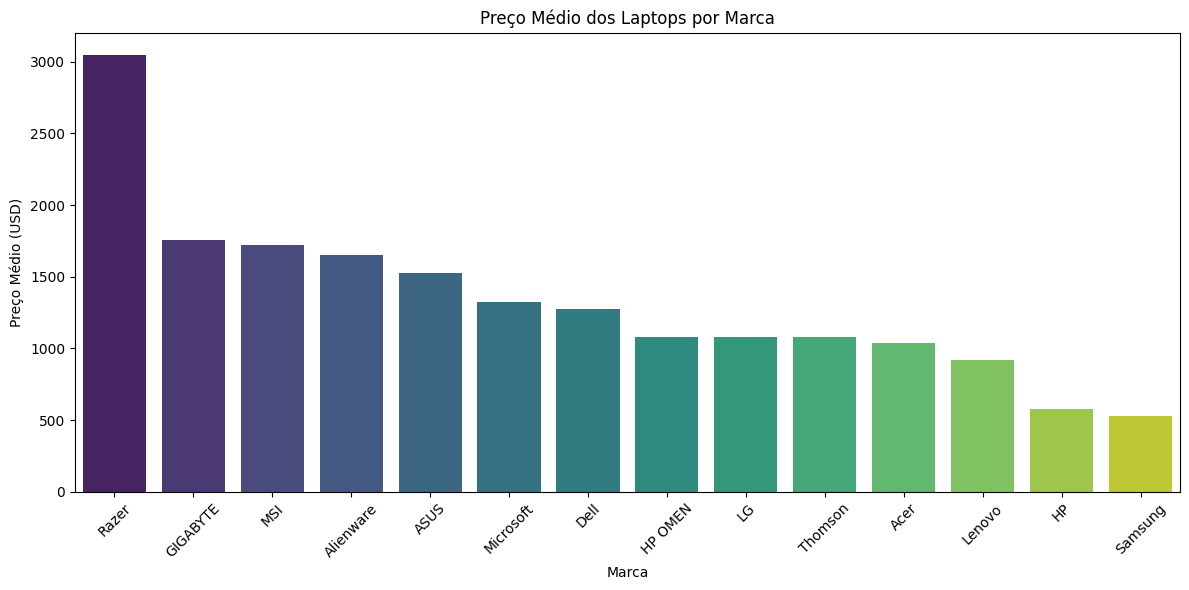

In [30]:
plt.figure(figsize=(12, 6))
preco_medio = df.groupby('brand')['offers/price'].mean().sort_values(ascending=False)
sns.barplot(x=preco_medio.index, y=preco_medio.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Marca')
plt.ylabel('Preço Médio (USD)')
plt.title('Preço Médio dos Laptops por Marca')
plt.tight_layout()
plt.show()

Relação entre avaliação e preço

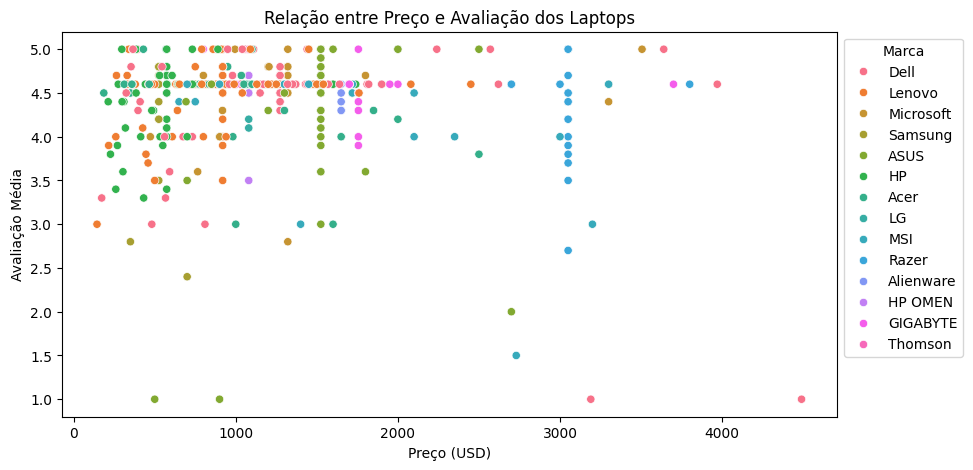

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='offers/price', y='aggregateRating/ratingValue', hue='brand', data=df)
plt.xlabel('Preço (USD)')
plt.ylabel('Avaliação Média')
plt.title('Relação entre Preço e Avaliação dos Laptops')
plt.legend(title='Marca', bbox_to_anchor=(1, 1))
plt.show()

Contagem de laptops por marca

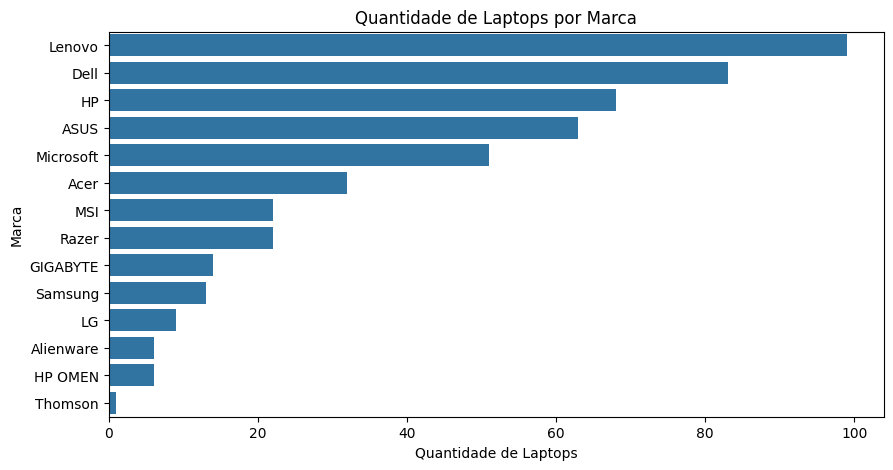

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index)
plt.xlabel('Quantidade de Laptops')
plt.ylabel('Marca')
plt.title('Quantidade de Laptops por Marca')
plt.show()

## Conclusões:
- 1. A maioria dos laptops possui avaliações entre 4.5 e 4.7, sugerindo alta satisfação dos clientes.
- 2. Há valores ausentes na coluna de preços, o que pode impactar análises financeiras.
- 3. A distribuição de preços varia significativamente entre as marcas, indicando diferentes segmentos de mercado.
- 4. A relação entre preço e avaliação não é linear, sugerindo que fatores além do custo influenciam a satisfação do cliente.
- 5. Algumas marcas possuem mais ofertas disponíveis do que outras, o que pode indicar maior popularidade ou disponibilidade no varejo.
- 6. Uma melhoria sugerida é preencher os valores ausentes de preços com a média da respectiva marca para evitar perda de informações.